In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

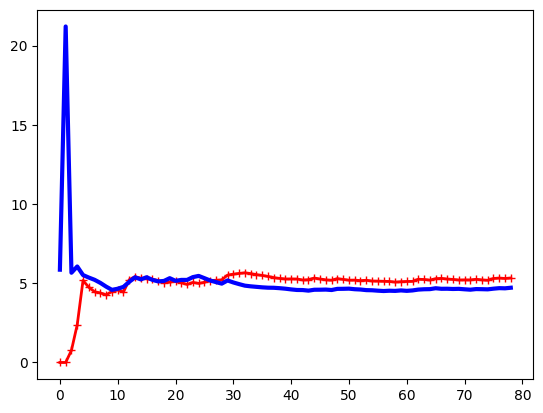

In [7]:
def plot_curvas_entrenamiento(modelo, X, y):
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
 train_errores, test_errores = [], []
 for n in range(1, len(X_train)):
     modelo.fit(X_train[:n], y_train[:n])
     y_train_predicciones = modelo.predict(X_train[:n])
     y_prediccion = modelo.predict(X_test)
     train_errores.append(mean_squared_error(y_train[:n], y_train_predicciones))
     test_errores.append(mean_squared_error(y_test, y_prediccion))
 plt.plot(np.sqrt(train_errores), "r-+", linewidth=2, label="train")
 plt.plot(np.sqrt(test_errores), "b-", linewidth=3, label="test")

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 * X**2 + 0.5
reg_lin = LinearRegression()
plot_curvas_entrenamiento(reg_lin, X, y)
plt.show()

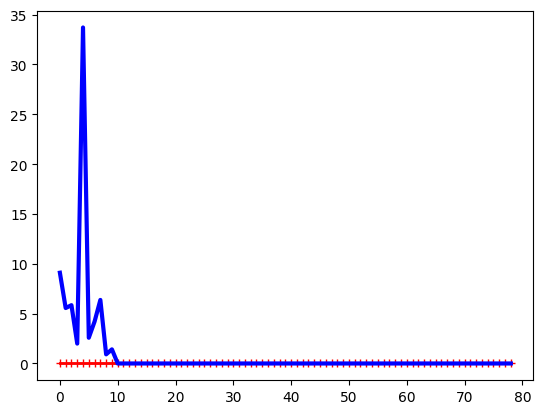

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
reg_poli = Pipeline([("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
 ("lin_reg", LinearRegression()),
 ])
plot_curvas_entrenamiento(reg_poli, X, y)
plt.show()


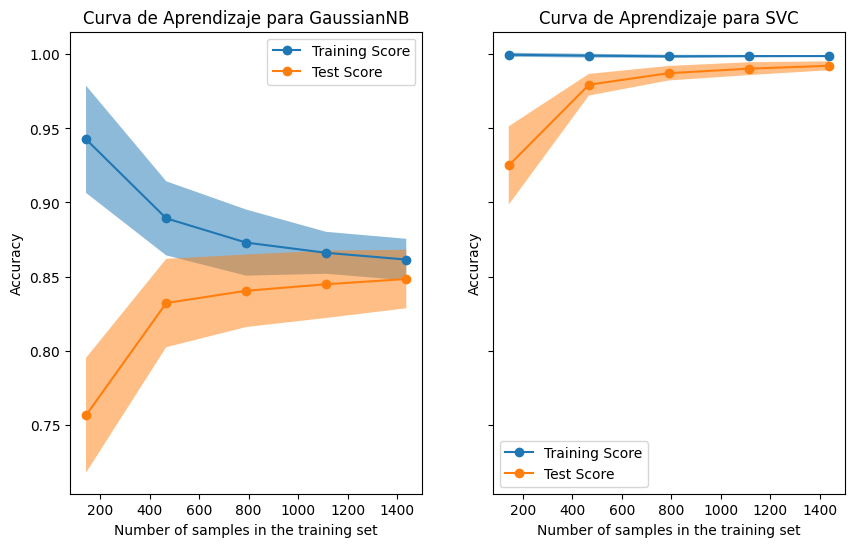

In [5]:
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# cargar los datos
X, y = load_digits(return_X_y=True)
nb = GaussianNB() # Un modelo que vemos en la siguiente unidad
svc = SVC(kernel="rbf", gamma=0.001) # Otro modelo de la siguiente unidad
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)
parametros = {
 "X": X,
 "y": y,
 "train_sizes": np.linspace(0.1, 1.0, 5),
 "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
 "score_type": "both",
 "n_jobs": 4,
 "line_kw": {"marker": "o"},
 "std_display_style": "fill_between",
 "score_name": "Accuracy",
}
for ax_idx, modelo in enumerate([nb, svc]):
 LearningCurveDisplay.from_estimator(modelo, **parametros, ax=ax[ax_idx])
 handles, label = ax[ax_idx].get_legend_handles_labels()
 ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
 ax[ax_idx].set_title(f"Curva de Aprendizaje para {modelo.__class__.__name__}")


In [6]:
# Variante usando factorización de Andre-Louis Cholesky
from sklearn.linear_model import Ridge
rl_ridge = Ridge(alpha=1, solver="cholesky")
rl_ridge.fit(X, y)
ridge_reg.predict([[1.5]]) # devuelve array([[1.55071465]])
# Usando DGS
rl_dgs = SGDRegressor(penalty="l2")
rl_dgs.fit(X, y.ravel())
rl_dgs.predict([[1.5]]) # devuelve array([1.47012588])


NameError: name 'ridge_reg' is not defined

In [3]:
from sklearn.linear_model import Lasso
rl_lasso = Lasso(alpha=0.1)
rl_lasso.fit(X, y)
rl_lasso_reg.predict([[1.5]]) # Resultado: array([1.53788174])

NameError: name 'rl_lasso_reg' is not defined